<a href="https://colab.research.google.com/github/KriseevM/SCM_task6/blob/master/interpolate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Интерполяция параметрически заданной функции
## Задача: 
Рассмотрим задачу поиска интерполирующей кривой по точкам
$p_1, p_2, \dots, p_n$, $p_i = (x_i, y_i)$ ($i=1,\dots,n$).
Предположим, что форму этой кривой
нельзя описать функцией вида $y=f(x)$. Например, этого нельзя сделать
для кривой в форме буквы S и др. (функция была бы неоднозначной).

Нарисуйте букву S (или любую другую) и измерьте координаты $8$ точек $p_i$,
лежащих на ней. Интерполируйте эти данные
 * кубическим интерполянтом;
 * кубическим сплайном.
 
Изобразите полученные кривые и сравните результаты.

## 1. Подготовка

Нам нужно задать координаты 8 точек нашей будущей кривой (буквы S)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial as poly
from scipy import interpolate
%matplotlib inline

In [120]:
x = np.array([3, 2, 1, .5, 3, 2.5, 1.5, .5])
y = np.array([4, 5, 5, 4, 2, 1, 1, 2])

Изобразим эти точки, чтобы убедиться в правильности их расположения. Просто соединив эти точки, получаем изображание угловатой буквы S, что нам подходит.

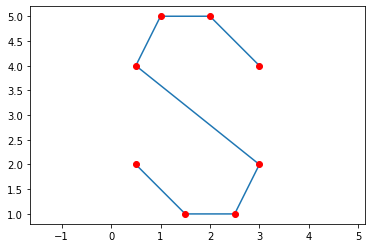

In [121]:
plt.axis('equal')
plt.plot(x, y, '-', x, y, 'or')
pass

## Решение первым способом
Для решения задачи можно рассмотреть два набора данных $(i, x_i)$ и $(i, y_i)$, где $i = 1, 2, ..., n$

Если их независимо интерполировать функциями $f(t)$ и $g(t)$, то получим параметрически заданную кривую:

$$
\left\{
\begin{array}{l}
x=f(t) \\
y=g(t)
\end{array}
\right.
$$

Эта кривая и будет интерполировать наши данные.

Создадим массив значений $i$ и точек $t$:

In [61]:
i = np.array([1, 2, 3, 4, 5, 6, 7, 8])
t = np.linspace(1, 8, 500)

Интерполируем их кубическим интерполянтом:

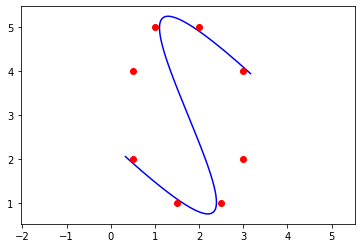

In [122]:
f = np.polyfit(i, x, 3)
g = np.polyfit(i, y, 3)
xx = np.polyval(f, t)
yy = np.polyval(g, t)
plt.axis('equal')
plt.plot(xx, yy, '-b', x, y, 'or')

Как можно видеть, в целом кривая похожа на очень кривую цифру 6, но всё же она очень далека от заданных точек 

Интерполируем теперь кубическим сплайном:

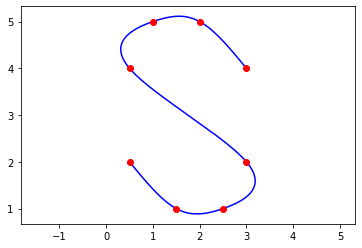

In [123]:
f = interpolate.interp1d(i, x, kind='cubic')
g = interpolate.interp1d(i, y, kind='cubic')
xx = f(t)
yy = g(t)
plt.axis('equal')
plt.plot(xx, yy, '-b', x, y, 'or')

Кубический сплайн справился с задачей гораздо лучше, 